In [46]:
import numpy as np
from scipy.special import erf
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [59]:
#Nome do arquivo a ser analisado
fileName = "foco4.txt"

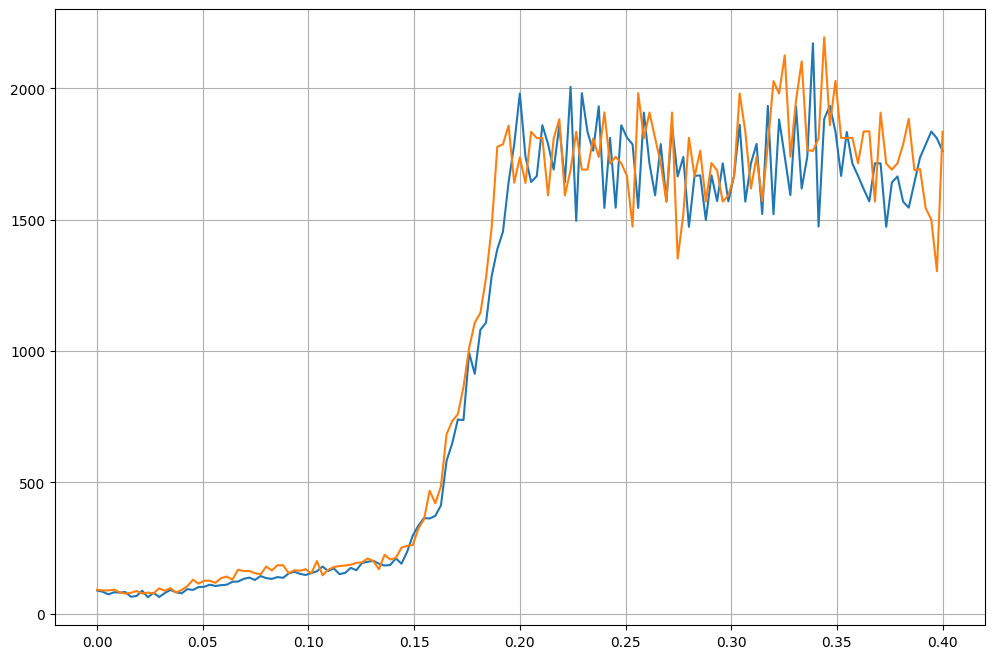

In [60]:
#abre o arquivo e salva as duas primeiras linhas como strings
with open(fileName) as file:
    line1 = file.readline().strip()
    line2 = file.readline().strip()

#salva os passos em X e Y como variáveis float
stepX = float(line1.split("Step X = ")[1].strip().replace(',','.'))
stepY = float(line2.split("Step Y = ")[1].strip().replace(',','.'))

#salva os dados do arquivo em um array, pulando as duas primeiras linhas
arr = np.loadtxt(fileName, skiprows=2)

#numero de elementos em X e Y
nX = arr.shape[1]
nY = arr.shape[0]

#eixo x do plot
Xvec = np.arange(0, nX, 1) * stepX
Yvec0 = arr[0]
Yvec1 = arr[1]

fig = plt.figure(figsize=(12,8))
plt.plot(Xvec, arr[0])
plt.plot(Xvec, arr[1])
plt.grid()
plt.show()

In [49]:
#define a função para o ajuste de curva
def rise_function(x, sigma, x0, I, C):
    return 0.5*I*(1+erf((x-x0)/(np.sqrt(2)*sigma))) + C

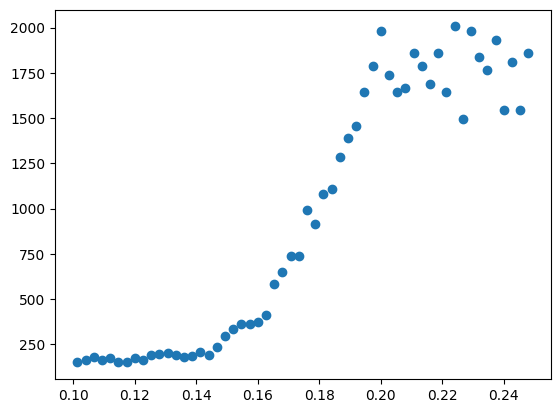

In [ ]:
#definição do intervalo em que ocorre a subida
inf_lim = 0.10
sup_lim = 0.25

x_data = Xvec[(Xvec>inf_lim) & (Xvec<sup_lim)]
y_data = Yvec0[(Xvec>inf_lim) & (Xvec<sup_lim)]
#y_data = Yvec1[(Xvec>inf_lim) & (Xvec<sup_lim)]

plt.scatter(x_data, y_data)
plt.show()

[1.54182614e-02 1.77830508e-01 1.60287154e+03 1.86184030e+02]
Sigma 0.015418261380251505


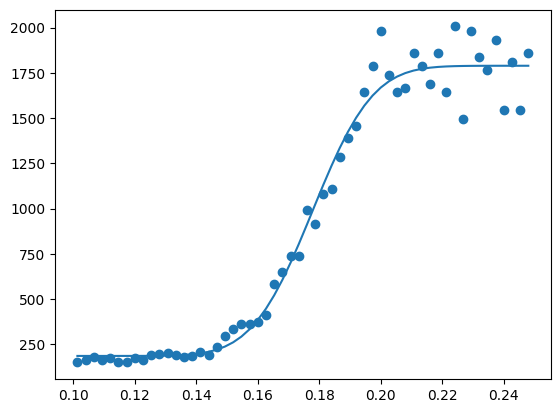

In [68]:
#AJUSTE DE CURVA
#guess para os valores iniciais dos parâmentros
p0 = [0.06, 0.14, 1875, 230]
popt, pcov = curve_fit(rise_function, x_data, y_data, p0)

print(popt)
sig, x0, I, C= popt

yopt = rise_function(x_data, sig, x0, I, C)
plt.scatter(x_data, y_data)
plt.plot(x_data, yopt)
print("Sigma", sig)